In [104]:
#!pip install --upgrade tensorflow-gpu==2.0
!pip install tensorflow

In [91]:
#!pip install plotly
#!pip install --upgrade nbformat
#!pip install nltk
#!pip install spacy
#!pip install WordCloud
#!pip install gensim
#!pip install seaborn
#!pip install matplotlib
#!pip install jupyterthemes
!pip install numpy
from numpy import loadtxt
import numpy as np
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

[nltk_data] Downloading package punkt to /Users/65172/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [182]:
# load the dataset
dataset_train=pd.read_csv("train.csv")
dataset_test=pd.read_csv("test.csv")

dataset_train.shape 

(20800, 5)

In [183]:
le = preprocessing.LabelEncoder() # once
encoded_dataset_train = dataset_train.apply(le.fit_transform)
encoded_dataset_test= dataset_test.apply(le.fit_transform)

print(dataset_train.head(10))
print(encoded_dataset_train.head())

   id                                              title  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2   2                  Why the Truth Might Get You Fired   
3   3  15 Civilians Killed In Single US Airstrike Hav...   
4   4  Iranian woman jailed for fictional unpublished...   
5   5  Jackie Mason: Hollywood Would Love Trump if He...   
6   6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7   7  Benoît Hamon Wins French Socialist Party’s Pre...   
8   8  Excerpts From a Draft Script for Donald Trump’...   
9   9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                           NaN   
7               Alissa J. Rubin   
8                       

In [185]:
print(X_train.shape)
# dataset.head(10)
# split into input (X) and output (y) variables
X_train = encoded_dataset_train.iloc[:,0:4]
y_train = encoded_dataset_train.iloc[:,4]

X_test = encoded_dataset_test.iloc[:,0:4]
y_test = encoded_dataset_test.iloc[:,4]

(20800, 2)


IndexError: single positional indexer is out-of-bounds

In [176]:
print(len(dataset_train.index))
print(len(dataset_test.index))

20800
5200
(20800, 2)


In [84]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim= 6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
# fit the keras model on the dataset
# X_train = np.asarray(X_train).astype(np.int)
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1, validation_split=0.33)

Epoch 1/150
1020/1020 [==============================] - 7s 4ms/step - loss: 28.0518 - accuracy: 0.4988 - val_loss: 1.7912 - val_accuracy: 0.4972
Epoch 2/150
1020/1020 [==============================] - 5s 5ms/step - loss: 1.1982 - accuracy: 0.4993 - val_loss: 0.8430 - val_accuracy: 0.4972
Epoch 3/150
1020/1020 [==============================] - 5s 4ms/step - loss: 0.7844 - accuracy: 0.4977 - val_loss: 0.7104 - val_accuracy: 0.5024
Epoch 4/150
1020/1020 [==============================] - 4s 4ms/step - loss: 0.7164 - accuracy: 0.4982 - val_loss: 0.6941 - val_accuracy: 0.4972
Epoch 5/150
1020/1020 [==============================] - 6s 5ms/step - loss: 0.7040 - accuracy: 0.4907 - val_loss: 0.6940 - val_accuracy: 0.4972
Epoch 6/150
1020/1020 [==============================] - 4s 4ms/step - loss: 0.6964 - accuracy: 0.5031 - val_loss: 0.6938 - val_accuracy: 0.5026
Epoch 7/150
1020/1020 [==============================] - 7s 7ms/step - loss: 0.6930 - accuracy: 0.4972 - val_loss: 0.6942 - val_a

1020/1020 [==============================] - 4s 4ms/step - loss: 0.6931 - accuracy: 0.5008 - val_loss: 0.6937 - val_accuracy: 0.5026
Epoch 58/150
1020/1020 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6937 - val_accuracy: 0.5026
Epoch 59/150
1020/1020 [==============================] - 4s 4ms/step - loss: 0.6931 - accuracy: 0.4923 - val_loss: 0.6937 - val_accuracy: 0.4974
Epoch 60/150
1020/1020 [==============================] - 5s 5ms/step - loss: 0.6931 - accuracy: 0.4959 - val_loss: 0.6937 - val_accuracy: 0.4974
Epoch 61/150
1020/1020 [==============================] - 4s 4ms/step - loss: 0.6931 - accuracy: 0.4992 - val_loss: 0.6937 - val_accuracy: 0.4974
Epoch 62/150
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.4960 - val_loss: 0.6937 - val_accuracy: 0.4974
Epoch 63/150
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4927 - val_loss: 0.6937 - val_accuracy

Epoch 113/150
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.4931 - val_loss: 0.6937 - val_accuracy: 0.4974
Epoch 114/150
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.4956 - val_loss: 0.6937 - val_accuracy: 0.5026
Epoch 115/150
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6937 - val_accuracy: 0.4974
Epoch 116/150
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6937 - val_accuracy: 0.5026
Epoch 117/150
1020/1020 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.4976 - val_loss: 0.6937 - val_accuracy: 0.5026
Epoch 118/150
1020/1020 [==============================] - 4s 4ms/step - loss: 0.6931 - accuracy: 0.4992 - val_loss: 0.6937 - val_accuracy: 0.5026
Epoch 119/150
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0

In [170]:
X_train = pad_sequences(sequences = X_train, maxlen = 4, padding = 'pre')

ValueError: invalid literal for int() with base 10: 'date'

In [159]:
# LSTM Neural Network
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = 6, output_dim = 1, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(Flatten())
lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(2,  activation = 'softmax', name = 'output_layer'))

In [160]:
print(y_train.shape)
print(X_train.shape)

(15212,)
(15212, 6)


In [161]:
# compile the keras model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [162]:
# fit the keras model on the dataset
# X_train = np.asarray(X_train).astype(np.int)
history_new = lstm_model.fit(X_train, y_train, epochs=5, verbose=1, validation_split=0.33)

Epoch 1/5


InvalidArgumentError:  indices[0,0] = 9580 is not in [0, 6)
	 [[node lstm_nn_model/1st_layer/embedding_lookup (defined at var/folders/74/pbg99trj5pzbpzx9hzcgsxrmwksdx5/T/ipykernel_92018/475672019.py:3) ]] [Op:__inference_train_function_2226986]

Errors may have originated from an input operation.
Input Source operations connected to node lstm_nn_model/1st_layer/embedding_lookup:
 lstm_nn_model/1st_layer/embedding_lookup/2225242 (defined at Users/65172/.pyenv/versions/3.7.5/lib/python3.7/contextlib.py:112)

Function call stack:
train_function


In [100]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train) # _ return 2 var.
print('Accuracy: %.2f' % (accuracy*100))

ValueError: Data cardinality is ambiguous:
  x sizes: 91272
  y sizes: 15212
Make sure all arrays contain the same number of samples.

In [62]:
# make class predictions with the model
predictions = model.predict_classes(X)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[5099, 6155, 1514] => 0 (expected 0)
[6187, 5747, 2185] => 0 (expected 0)
[2148, 2946, 5165] => 1 (expected 1)
[6098, 653, 5991] => 0 (expected 0)
[534, 4788, 2733] => 1 (expected 1)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


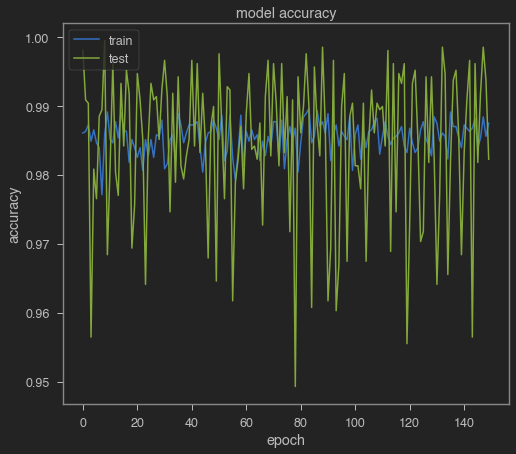

In [63]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()